<a href="https://colab.research.google.com/github/jhonatanparada499/supervised-learning-notes/blob/main/recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split

# Import image processing library 2026-02-10
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

# Import os to handle local files
import os

## Data Transformation Example

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 2. 2. 3. 5. 2. 3. 1.]
 [0. 2. 1. 0. 3. 3. 6. 4.]
 [0. 2. 1. 0. 1. 2. 0. 1.]
 [0. 2. 2. 0. 1. 1. 0. 0.]
 [0. 1. 4. 1. 2. 1. 0. 0.]
 [0. 0. 2. 3. 1. 0. 0. 0.]]


Text(0.5, 1.0, 'Grayscale')

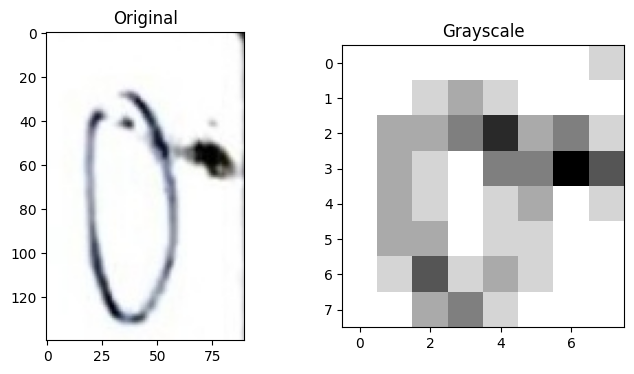

In [2]:
IMG_PATH = "archive/0/Zero_full (1).jpg"
img = imread(IMG_PATH) # converts .jpg img into numerical data
gray_img = rgb2gray(img) # converst img to black and white
resized_img = resize(gray_img, (8, 8), anti_aliasing=True) # makes img be 8x8 pixels

# Scaling values inside the img array
resized_img = resized_img / np.max(resized_img) # calcs pixel intensity relative to higher one in the img
resized_img = 16 - (resized_img * 16) # assigns pixels a value btw 0 - 16 
resized_img = np.round(resized_img, 0) # 0 means the number of decimals

print(resized_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")
ax[1].imshow(resized_img, cmap=plt.cm.gray_r) # gray_r means inverted gray
ax[1].set_title("Grayscale")

## Processing Multiple Pictures

In [3]:
PATH = "archive/"

# production
categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# testing
# categories = ["0", "1"]

images = []
labels = []

# Iterates through every directory in archive/
for index, category in enumerate(categories):
    for file in os.listdir(os.path.join(PATH, category)):
        img_path = os.path.join(PATH, category, file)
        img = imread(img_path)
        gray_img = rgb2gray(img)
        img_resize = resize(gray_img, (8, 8), anti_aliasing=True)

        # Scaling pixel values inside img array
        img_resize = img_resize / np.max(img_resize)
        img_resize = 16 - (img_resize * 16)  # assigns pixels a value btw 0 - 16
        img_resize = np.round(img_resize, 0)  # 0 means the number of decimals

        # Populate Data(after flattening) and Label values
        images.append(img_resize)

        # Task: get
        labels.append(index)

# print(images[0])
# print()
# print(labels[0])

## Checking Data with Labels

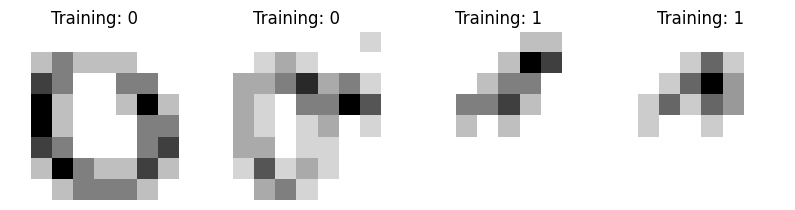

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, images, labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Task: Test the same after shuffling the data

## Classification & Training Data After Shuffle

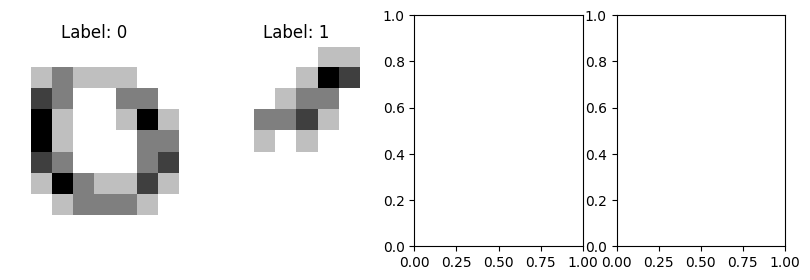

In [10]:
# flatten the images
n_samples = len(images)
# data = images.reshape((n_samples, -1)) # returns error bc reshape is not a memeber of built-in list
data = np.array([img.ravel() for img in images])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.5, shuffle=True # Originally was False
)

# Training images with labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    # image = image.reshape(8, 8) # returns error bc reshape is not a member of built-in list (only works with scikit-learn dataset)
    image.shape = (8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

## Training & Prediction

In [6]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

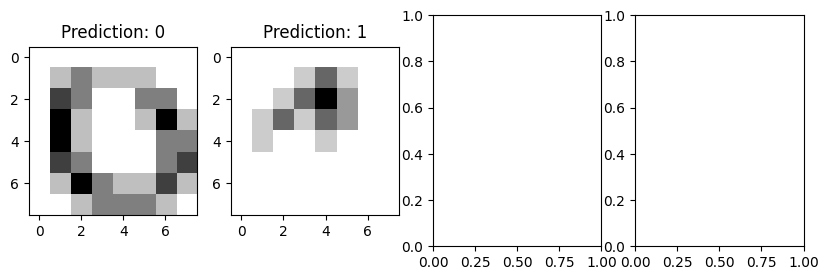

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    # ax.set_axis_off()
    #image = image.reshape(8, 8) # returns error in my version
    image.shape = (8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Report

In [8]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


